In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv('segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.drop('ID', axis=1, inplace=True)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [4]:
features=df[['Age','Income']]

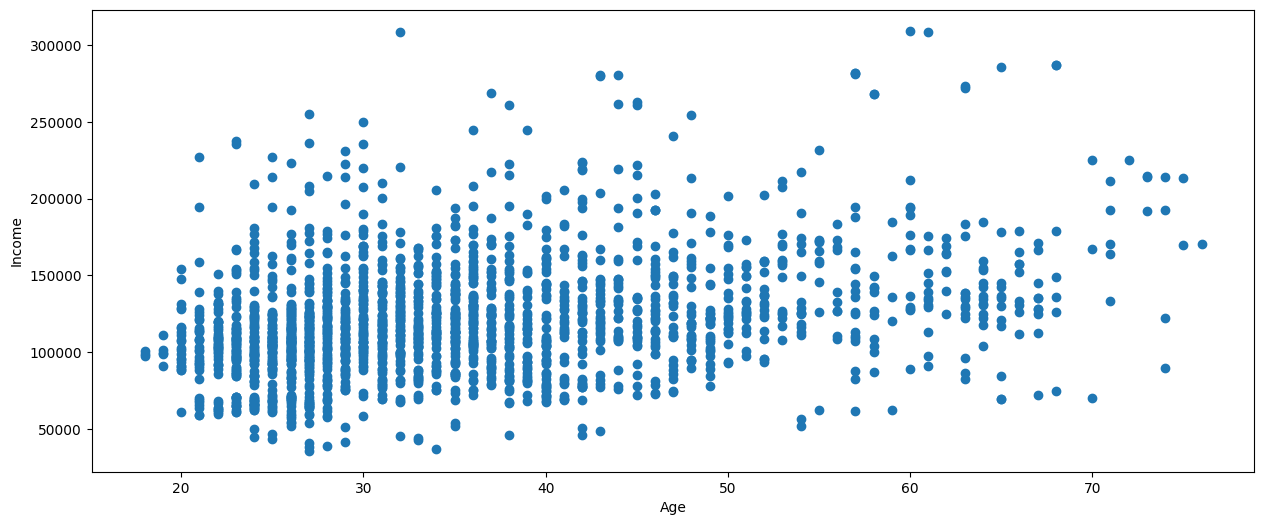

In [8]:
plt.figure(figsize=(15,6))
plt.scatter(df["Age"],df["Income"])

plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [12]:
y_hc=[]

for i in range(2,6):

    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    y_hc.append(hc.fit_predict(features))

for i in range(len(y_hc)):

    y_hc[i]

d:\Vybhav\Anaconda\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
d:\Vybhav\Anaconda\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
d:\Vybhav\Anaconda\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
d:\Vybhav\Anaconda\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [13]:
df['2_Clusters'] = y_hc[0]
df['3_Clusters'] = y_hc[1]
df['4_Clusters'] = y_hc[2]
df['5_Clusters'] = y_hc[3]

# Plotting the clusters

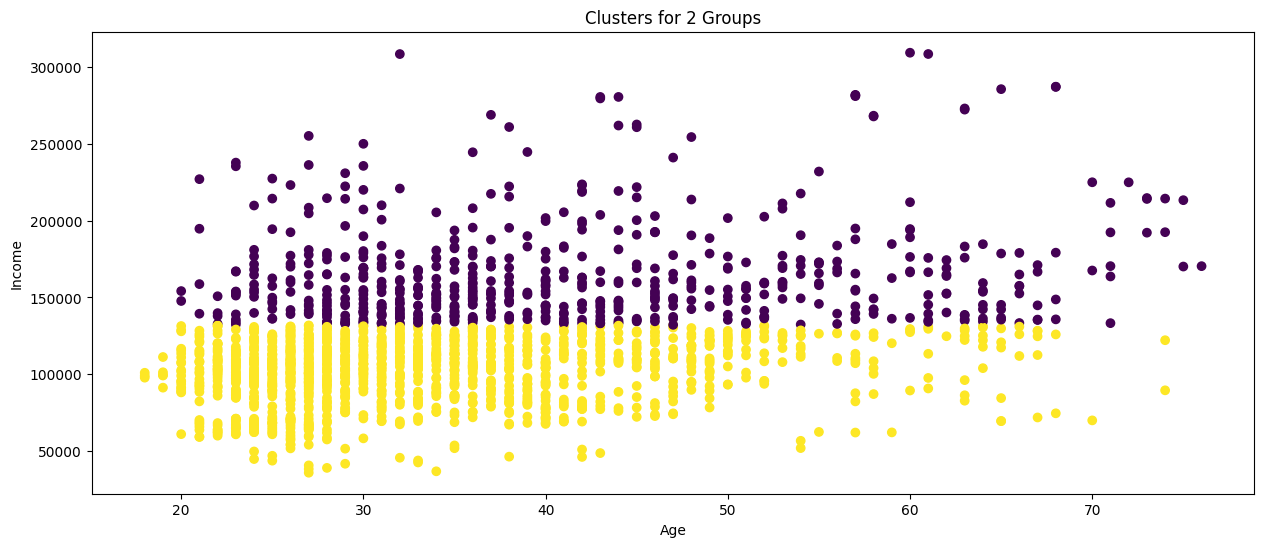

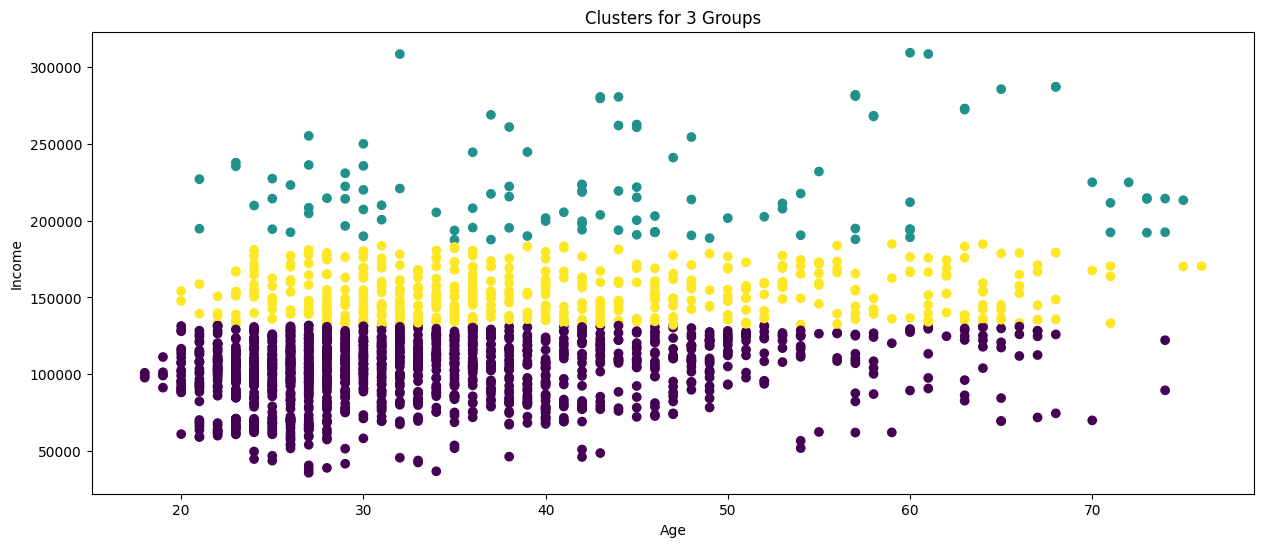

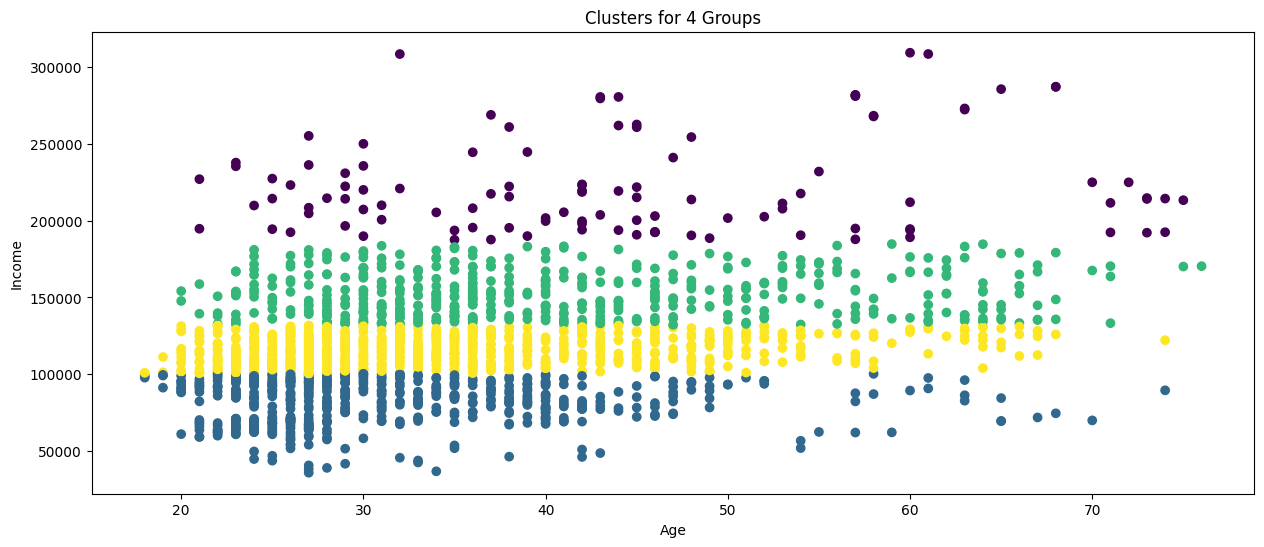

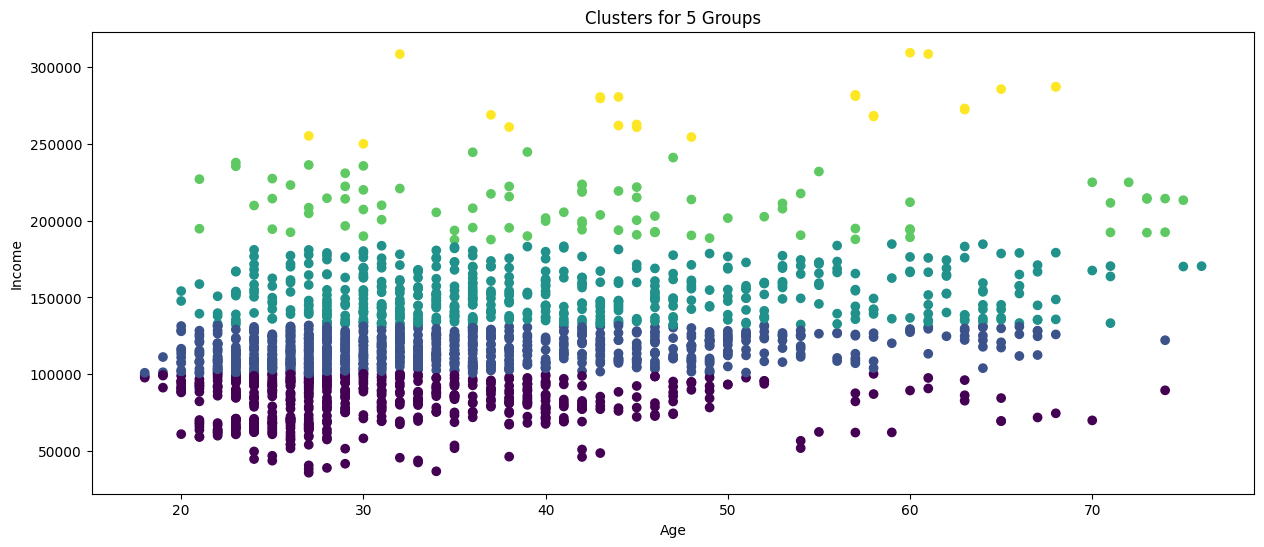

In [15]:
for i in range(2, 6):
    plt.figure(figsize=(15, 6))
    plt.scatter(df['Age'], df['Income'], c=df[f'{i}_Clusters'], cmap='viridis')
    plt.title(f'Clusters for {i} Groups')
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.show()

# Plotting the dendrogram

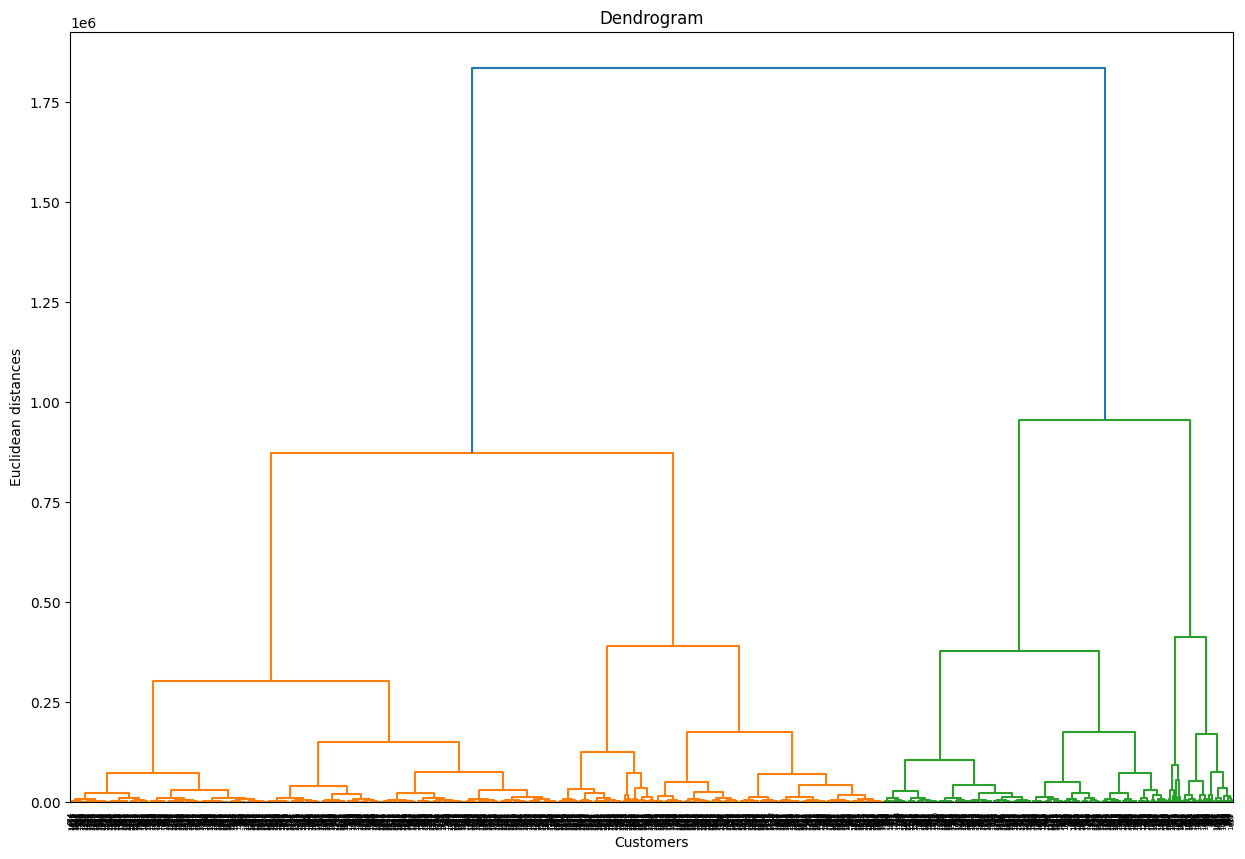

In [16]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()